# The problem

Consider the following general pde problem in strong form: 

Find $u(x,t;\mu)\in V$ such that
$$ L(\mu)u(x,t; \mu)=s(x,t;\mu) $$

where $x\in \Omega \subset \mathbb{R}^d$, $t\in \mathbb{R}$, $u(x,t;\mu) \in V\{\Omega \times \mathbb{R}\}$ where $V$ is a Hilbert space with dual $V'$. $L(\mu):V \rightarrow V'$ is a second order differential operator, and $s(\mu)\in V'$. $\mu \in \mathcal{P} \subset \mathbb{R^P}$ is a set of parameters that describe the physical or geometric properties of the system.

Problems such as these are very common in the natural world, for example in modelling heat dissipation where the parameters may describe the conductivity of the material or source terms, or the propagation of waves where the parameters could describe the source and/or the propagation medium. 

Once parameter values have been specified, there are many numerical techniques to find high fidelity approximate solutions. In some situations we need to understand how the solutions changes as the parameters are varied, but to exhaustively solve the problem over the whole parameter space may be impossible or at least computationally infeasible. Model order reduction techniques are approaches to solve this computational problem by replacing the high fidelity problem  with one of much lower computational complexity.

Reduced basis methods are a family of model order reduction techniques which exploit the parameter dependence of the solution space. Let us denote the numerical solution space by $V_h \subset V$, where $\mbox{dim} V := N_h  $ is finite, but may be large. The solutions to the numerical problem lie on a manifold 
$$ \mathcal{M}_h := \{ u_h(\mu)\in V_h : \mu \in \mathcal{P} \} \subset V_h, $$

which may be of low dimension. Reduced basis methods assume that this manifold could be approximated by linear combinations of some subset of its elements. The crux of the method is to generate a subspace $V_N \subset V_h$ of dimension $N << N_h$, and find approximate solutions within this subspace. In broad strokes, this is comprised of three steps:

1.  Starting with a set of high fidelity solutions $\{u_h\{\mu^i\}\}_{i=1}^N$ corresponding to a set of parameters $S=\{ \mu^i \}_{i=1}^N \subset \mathcal{P}$, construct a basis $\{\xi^i\}$ of $V_N$ by orthonormalising the $u^i$.

2. Construction of the RB solution (expand)

3. Evaluating unknown coefficients. (expand)

Here we will explore the efficiency and accuracy of different methods to complete these steps for the wave equation solved using pseudo-spectral methods.

# Spectral methods

A spectral method assumes that the solution $u$ to the partial differential equation can be written 

$$ u(x,t;\mu) = \sum_{k=0}^\infty \hat{u}_k(t) \psi_k(x) $$

where the $\psi_k(x)$ form a complete set of globally smooth basis functions. 

(In comparison, a finite difference method uses local, low order polynomials, and a finite element method uses locally smooth functions with compact support.)

We assume the basis functions $\psi_k: \Omega \rightarrow \mathbb{R}$ are orthogonal in $L^2_w$, that is
$$ (\psi_j, \psi_k) := \gamma_k \delta_{jk} $$

under the inner product 

$$ (f,g)_w = \int_{\Omega}f(x)g(x)w(x)dx $$

where $w \in L^1(\Omega)$ is a weight function. Then, in the projection above 

$$ \hat{u}_k(t)= \frac{1}{\gamma_k}(u,\psi_k)_w. $$

\textit{Fill in here: typically basis functions satisfy Sturm Liouiville, e.g. Fourier, Lagrange, Chebyshev. Convergence analysis. Truncation error.}

\textit{Fill in here: typically basis functions satisfy Sturm Liouiville, e.g. Fourier, Lagrange, Chebyshev. Convergence analysis. Truncation error.}

1. Galerkin methods require the residual to be orthogonal to the space spanned by the basis functions i.e. 
$$ (R_h, \psi_k) = 0  \forall k \in \{0, ..., N\} $$
where the basis functions satisfy the boundary conditions of the problem.
2. Tau methods are similar, except the basis functions do not need to satisfy the boundary conditions.
3. Pseudo-spectral, also known as collocation methods, require the residual to vanish at a finite set of collocation points ${x_i}$
$$ (R_h, \delta(x-x_i))= 0 $$

# Chebyshev polynomials

For problems that do not display periodicity, polynomial bases are a good choice for basis functions. The Chebyshev polynomials are a commonly used family of polynomials defined as 
$$T_n(x)=\cos (n \arccos x)$$
for $x \in [-1,1]$. It is clear from inspection that the first two polynomials are 
$$ T_0(x)=1 $$
$$ T_1(x)=x. $$
From these we can find the other Chebyshev polynomials through the relationship
$$ T_{n+1}(x) = 2x T_n(x) -T_{n-1}(x). $$

For $n> 0$, the $n$-th Chebyshev polynomial has exactly $n$ zeros in the interval $[-1,1]$ at the points $X_k=\cos\frac{\pi (k+1/2)}{n}$ for $k=0,...n-1$. It takes its extrema values of $\pm 1$ at $X_k=\cos(\frac{\pi k}{n})$, $k=0,...n$, and has left boundary values $T_n(-1)=(-1)^n$.  

Chebyshev polynomial routines are implemented in the \verbatim{numpy.polynomial.chebyshev} module. 

Roots of the Chebyshev polynomial T 1
[-0.]
Roots of the Chebyshev polynomial T 2
[-0.70710678  0.70710678]
Roots of the Chebyshev polynomial T 3
[-8.66025404e-01  2.81729083e-17  8.66025404e-01]
Roots of the Chebyshev polynomial T 4
[-0.92387953 -0.38268343  0.38268343  0.92387953]
Roots of the Chebyshev polynomial T 5
[-9.51056516e-01 -5.87785252e-01  1.46034345e-17  5.87785252e-01
  9.51056516e-01]


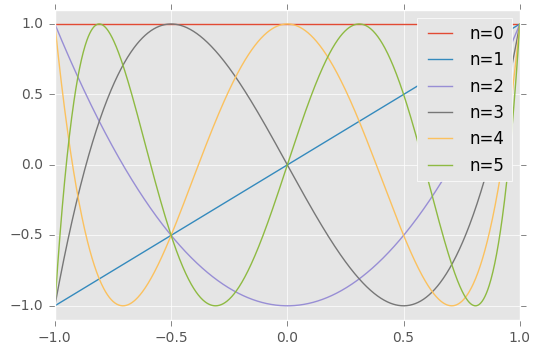

[ 1. -1.  1. -1.  1. -1.]
[1. 1. 1. 1. 1. 1.]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.polynomial.chebyshev as cheb

x= np.linspace(-1,1,1000)
N=5
Tkn1=[] #Tk at the left boundary x=-1
Tk1=[]
for n in range(N+1):
    c=np.zeros(n+1)
    c[-1]=1
    
    #evaluate the polynomial
    #p(x)=c[0]*T0(x)+c[1]*T1(x)..
    p=cheb.chebval(x,c)
    Tkn1.append(cheb.chebval(-1,c))
    Tk1.append(cheb.chebval(1,c))
    plt.plot(x,p,label='n='+str(n))
    
    if n>0:
        #find the roots of p as above
        print('Roots of the Chebyshev polynomial T',n)
        print(cheb.chebroots(c))
        
plt.ylim(-1.1,1.1)    
plt.legend()    
plt.show()
Tkn1=np.array(Tkn1)
Tk1=np.array(Tk1)
print(Tkn1)
print(Tk1)

The Chebyshev polynomials form an orthogonal $L^2_w[-1,1]$-complete basis under the weight 
$$ w=\frac{1}{\sqrt{1-x^2}},$$
i.e
$$ (T_j,T_k)=\int_{-1}^1 T_j(x)T_k(x)w(x)dx=\gamma_k \delta_{kj}$$
where $\gamma_k = \frac{\pi}{2-\delta_{k0}}$

Thus any function $u(x)\in L^2_w[-1,1]$ can be written
$$ u(x)=\sum_{k=0}^{\infty} \hat{u}_k T_k(x) $$ 
where
$$ \hat{u}_k = \frac{1}{\gamma_k}(u,T_k). $$

We will use the truncated expansion 
$$ u(x)\approx u^{(N)}(x)=\sum_{k=0}^{N} \hat{u}_k T_k(x). $$ 
(truncation errors ...)

### Calculating the coefficients- Chebyshev Gauss-Lobatto quadrature

To find the coefficients $\hat{u}_k$ we must perform an integration
$$ \hat{u}_k = \frac{1}{\gamma_k}(u,T_k)=\int_{-1}^1 u(x)T_k(x)w(x)dx. $$

Numerically, this is achieved via Gauss-Lobatto quadrature, in which the collocation points are at the extrema $X_j=-\cos (\frac{\pi j}{N})$, $j=0...N$ (the negative is so they are in increasing order), resulting in the expression
$$ \hat{u}_k = \frac{2}{N c_k}\sum_{j=0}^N \frac{1}{c_j} u(X_j) T_k(X_j),$$
where
$$ c_k=\begin{array}{ll}
             2 & k=0,N \\
             1 & k=1,...N-1 
            \end{array}$$

(expand)

In [19]:
def findCoeffs(u, N):
    """Find the coefficients for the expansion in Chebyshev polynomial basis
    
    Input: function u defined over [-1,1]
            max order of Cheb poly N
    
    Output: N+1- length numpy array containing coefficients
    """
    
    c=np.ones(N+1)
    c[0]=2
    c[-1]=2
    
    #Gauss-Lobatto points
    X=np.zeros(N+1)
    for j in range(N+1):
        X[j]=-np.cos(np.pi*j/N)
        
    uhat=np.zeros(N+1)
    
    for k in range(N+1):
        m=2./(N*c[k])
        d=np.zeros(k+1)
        d[-1]=1
        for j in range(N+1):
            uhat[k]=uhat[k]+u(X[j])*cheb.chebval(X[j],d)/c[j]
        uhat[k]=m*uhat[k]
    
    return uhat

#test: the function below is T_0+T_1, so we expect the first two entries to be 1 and the others zero 
u = lambda x: x+1.
uhat=findCoeffs(u,N)
print(uhat)

[ 1.00000000e+00  1.00000000e+00 -1.77635684e-16 -8.88178420e-17
  0.00000000e+00  0.00000000e+00]


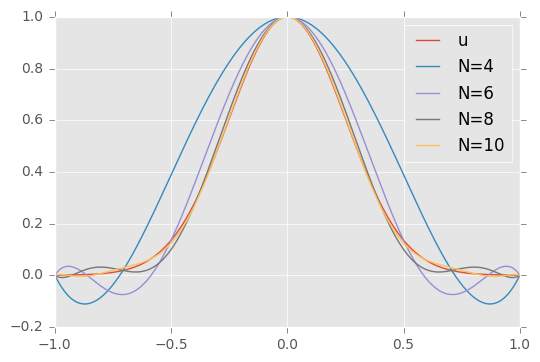

In [20]:
#let's see how the accuracy improves for a non-polynomial function 
u=lambda x: np.exp(-8*x**2)
plt.plot(x,u(x), label='u')

for N in range(4,11,2):
    uhat=findCoeffs(u,N)
    plt.plot(x,cheb.chebval(x,uhat), label='N='+str(N))

plt.legend()
plt.show()

The reconstruction is exact at the Gauss-Lobatto points and is given by
$$ u_k \equiv u(X_k)=u^{(N)}(X_k)=\sum_{i=0}^N \hat{u}_i T_i(X_k)$$

In [21]:
def recon(uhat):
    N=len(uhat)-1

    #Gauss-Lobatto points
    X=np.zeros(N+1)
    for j in range(N+1):
        X[j]=-np.cos(np.pi*j/N)
    
    uk=np.zeros(N+1)
    for k in range(N+1):
        for i in range(N+1):
            d=np.zeros(i+1)
            d[-1]=1
            uk[k]=uk[k]+uhat[i]*cheb.chebval(X[k],d)

    return uk

uk=recon(uhat)

#Gauss-Lobatto points
X=np.zeros(N+1)
for j in range(N+1):
    X[j]=-np.cos(np.pi*j/N)

np.isclose(uk,u(X))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Lagrange interpolation to reconstruct the function.


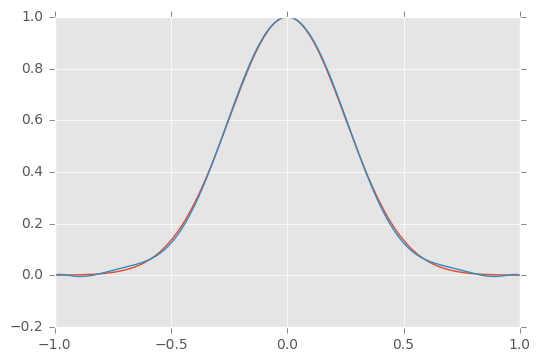

In [22]:
from scipy.interpolate import lagrange

u_rec = lagrange(X,uk)

plt.plot(x,u(x))
plt.plot(x,u_rec(x))
plt.show()

### Derivatives of Cheybshev polynomials

The derivatives of the Chebyshev polynomials satisfy the relations 
$$ T'_n(x)=2n(T_{n-1}(x)+T_{n-3}(x) + T_{n-5}(x)...T_1(x)) \mbox{   $n$ even} $$
$$ T'_n(x)=2n(T_{n-1}(x)+T_{n-3}(x) + T_{n-5}(x)...T_2(x))+nT_0 \mbox{   $n$ odd} $$
We can express this as
$$ T_j'(x) = \sum_{k=0}^N D_{jk} T_k(x) $$ 
where
$$ D_{jk}=
\left[ \begin{array}{ccccc}
0 & \cdots & \cdots &\cdots & 0  \\
1 & 0 & \cdots & \cdots & 0 \\
0 & 4 & 0 & \cdots & 0 \\
3 & 0 & 6 & \cdots & 0  \\
\vdots & & & \ddots & \vdots \end{array} \right]
$$

This means the derivative of our function $u$ can be written
$$  u'(x)=\sum_{j=0}^{N}\sum_{k=0}^N \hat{u}_j D_{jk} T_k(x)=\sum_{k=0}^N \tilde{u}_k T_k(x) $$ 
where $\tilde{u}_k=\sum_{j=0}^{N}\hat{u}_j D_{jk}$.

In [23]:
#construct the derivative matrix D
N=10

def chebDerivativeMatrix(N):
    D=np.zeros((N,N))
    for n in range(N):
        if n == 0:
            continue
        elif n%2==0:
            i=n-1
            while i > 0:
                D[n,i]=2*n
                i=i-2
        else:
            i=n-1
            while i>0:
                D[n,i]=2*n
                i=i-2
            D[n,0]=n
    return D

D = chebDerivativeMatrix(N+1)
print(D.shape)

(11, 11)


## Chebyshev collocation

We require the residual 
$$ R_N= L(\mu)u_N(x,t; \mu)-s_N(x,t;\mu), $$
to vanish at a set of collocation points.

Because we are considering boundary value problems, we use the Gauss-Lobatto points $X_j=-\cos (\frac{\pi j}{N})$ again.

# Chebshev collocation method for simple problem

We solve the advection equation  

$$ \partial_t u +v \partial_x u =0$$

for $x\in [-1,1]$, with initial condition $u(x,0)=u_0(x)=\sin(\pi x)$ and boundary condition $u(-1,t)=g(t) = \sin(-\pi vt)$. This has exact solution $u(x,t)=\sin(\pi(x-vt))$.


In [24]:
v=2.
ue=lambda x,t: np.sin(np.pi*(x-v*t))

0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


0


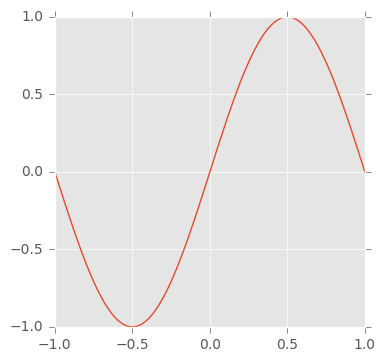

In [8]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

fig, ax = plt.subplots(1)
ax.set_aspect(1.)
ax.set_title('Exact', fontsize=12)

t=np.linspace(0,1,1000)
x=np.linspace(-1,1,100)
ues=[ue(x,0)]
for tt in t[1:]:
    ues.append(ue(x,tt))

#initial plot
exact=ax.plot(x,ues[0])
ymin,ymax=-1, 1 #plt.ylim()

#function to update plot
def animate(i):
    if i%50==0:
        print(i)
    ax.clear()
    plt.ylim((ymin,ymax))
    exact=ax.plot(x,ues[i])
    return exact,
    
anim = FuncAnimation(
    fig, animate, interval=50,frames=len(t))

HTML(anim.to_html5_video())

In [25]:
np.shape(ues[0])

(100,)


We seek a solution of the form 
$$ u^{(N)} (x,t) = \sum_{k=0}^{N} \hat{u}_k(t) T_k(x).$$

Substituting this into the problem definition, we get
$$ \partial_t \sum_{k=0}^{N} \hat{u}_k(t) T_k(x) = -v  \sum_{k=0}^{N} \sum_{j=0}^{N}\hat{u}_j D_{jk} T_k(x).$$
By evaluating these at the interior Gauss-Lobatto points, we get a system of $N-1$ ODEs for the $N-1$ coefficients $u_k$. 
$$ \frac{d}{dt}  \sum_{k=1}^{N-1} \hat{u}_k(t) T_k(X_i) = -v  \sum_{k=1}^{N-1} \sum_{j=1}^{N-1}\hat{u}_j D_{jk} T_k(X_i).$$

If we define $\mathbb{T}_{ik}=T_k (X_i)$, we can write this in matrix form 
$$ \mathbb{T} d_t \hat{\underline{u}} = -v \mathbb{T} D^T  \hat{\underline{u}} $$
In this case, as $v$ is constant, we can cancel the $\mathbb{T}$ to simply get
$$  d_t \hat{\underline{u}} = -v D^T  \hat{\underline{u}} $$

We will integrate this using a fourth order Runge-Kutta method to find the $u_k$ at each timestep, which we will use to reconstruct the function $u$. 

Step 1 is calculating the coefficients for the initial condition $\hat{u}_0$. 

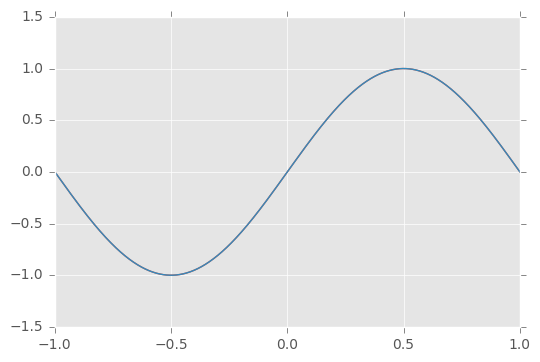

In [26]:
u0=lambda x: np.sin(np.pi*x)
g=lambda t: np.sin(-np.pi*v*t)
gt=lambda t: -np.pi*v*np.cos(-np.pi*v*t)

u0hat=findCoeffs(u0,N)

#reconstruct to check
uN=[cheb.chebval(x,u0hat)]

plt.plot(x,u0(x))
plt.plot(x,uN[0])
plt.show()

In [10]:
def Tmatrix(N):
    T=np.zeros((N,N))
    
        #Gauss-Lobatto points
    X=np.zeros(N)
    for j in range(N):
        X[j]=-np.cos(np.pi*j/N)
    
    for k in range(N):
        d=np.zeros(k+1)
        d[-1]=1
        T[k]=cheb.chebval(X,d)

    return T

T=Tmatrix(N)

In [11]:
T

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-1.00000000e+00, -9.51056516e-01, -8.09016994e-01,
        -5.87785252e-01, -3.09016994e-01, -6.12323400e-17,
         3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
         9.51056516e-01],
       [ 1.00000000e+00,  8.09016994e-01,  3.09016994e-01,
        -3.09016994e-01, -8.09016994e-01, -1.00000000e+00,
        -8.09016994e-01, -3.09016994e-01,  3.09016994e-01,
         8.09016994e-01],
       [-1.00000000e+00, -5.87785252e-01,  3.09016994e-01,
         9.51056516e-01,  8.09016994e-01,  1.83697020e-16,
        -8.09016994e-01, -9.51056516e-01, -3.09016994e-01,
         5.87785252e-01],
       [ 1.00000000e+00,  3.09016994e-01, -8.09016994e-01,
        -8.09016994e-01,  3.09016994e-01,  1.00000000e+00,
         3.09016994e-01, -8.09016994e-01, -8.09016994e-01,
         3.

In [12]:
Tinv=np.linalg.inv(T)

In [13]:
def f(t,u,gt=lambda t: -np.pi*v*np.cos(-np.pi*v*t)):
    v=2.
    D=chebDerivativeMatrix(len(u))
    T=Tmatrix(len(u))
    Tinv=np.linalg.inv(T)
    b=np.zeros(len(u))
    b[0]=gt(t)+v*np.dot(T[0],np.dot(D.T,u))
    return -v*np.dot(D.T,u)+np.dot(Tinv,b)    

In [14]:
print(chebDerivativeMatrix(len(uhat[0])).shape)
print(Tmatrix(len(uhat[0])).shape)

TypeError: object of type 'numpy.float64' has no len()

In [17]:
uhat=[u0hat]
tt=0
h=1/len(t)

for i in range(len(t)):
    u1,tt=euler(tt,uhat[i],f,h)
    uhat.append(u1)

#reconstruct
uN=cheb.chebval(x,uhat[-1])

plt.plot(x,uN)
plt.plot(x,ue(x,t[-1]))
plt.show()

NameError: name 'euler' is not defined

In [67]:
len(t)

1000

Next we time step the ODE using a fourth order Runge-Kutta method.

## The Fourth Order Runge-Kutta Method.

We wish to approximate the solution to a problem of the form
$$ \frac{d u(t)}{dt} = f(u(t),t) $$
with initial condition $u(0)=u_0$. 

The fourth order Runge-Kutta method is given by 
$$ \begin{array}{rcl}
u_{i+1} &=& u_i +h(k_0+2(k_1+k_2)+k_3)/6 \\
t_{i+1} &=& t_i + h \end{array} $$
where $h>0$ is the time step and 
$$ \begin{array}{rcl}
k_0 &=& f(u(t_i), t_i) \\
k_1 &=& f(u(t_i)+\frac{h k_0}{2}, t_i +\frac{h}{2}) \\
k_2 &=& f(u(t_i)+\frac{h k_1}{2}, t_i +\frac{h}{2}) \\
k_3 &=& f(u(t_i)+hk_2, t_i +h) \end{array} $$



In our case $u$ is $N+1$ dimensional and 
$$  f = -v D^T  \hat{\underline{u}} $$

In [11]:
def f(t,u):
    v=2.
    D=chebDerivativeMatrix(len(u))
    return -v*np.dot(D.T,u)

In [12]:
from scipy.integrate import solve_ivp
uhat1=solve_ivp(f,[0,1],u0hat,method='RK45',t_eval=t)

In [13]:
np.shape(uhat1.y)

(11, 1000)

0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


0


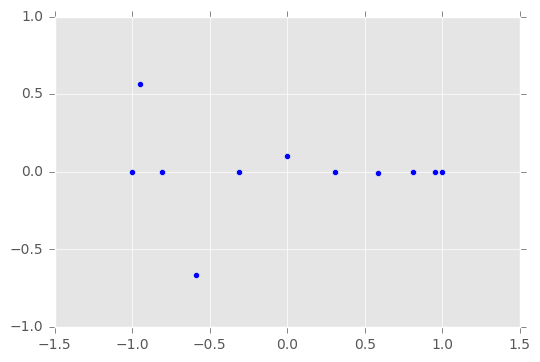

In [14]:
fig, ax = plt.subplots(1)
ax.set_aspect(1.)
ax.set_title('Coeffs', fontsize=12)

#initial plot
coeffs=ax.scatter(X,uhat1.y.T[0])
ymin,ymax=-1, 1 #plt.ylim()

#function to update plot
def animate(i):
    if i%50==0:
        print(i)
    ax.clear()
    plt.ylim((ymin,ymax))
    coeffs=ax.scatter(X,uhat1.y.T[i])
    return coeffs,
    
anim = FuncAnimation(
    fig, animate, interval=50,frames=len(t))

HTML(anim.to_html5_video())

OSError: [WinError 6] The handle is invalid

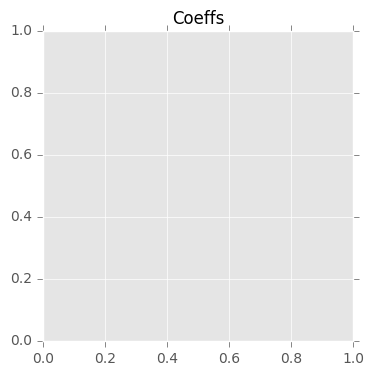

In [73]:
fig, ax = plt.subplots(1)
ax.set_aspect(1.)
ax.set_title('Coeffs', fontsize=12)

#initial plot
#coeffs=ax.plot(x,cheb.chebval(x,uhat1.y.T[0]))
#plt.ylim((ymin,ymax))
ymin,ymax=-1, 1 #plt.ylim()

#function to update plot
def animate(i):
    if i%50==0:
        print(i)
    ax.clear()
    plt.ylim((ymin,ymax))
    coeffs=ax.plot(x,cheb.chebval(x,np.array(uhat)[i]))
    return coeffs,
    
anim = FuncAnimation(
    fig, animate, interval=50,frames=len(t))

HTML(anim.to_html5_video())

In [22]:
def RK4(t, u, fu, h):
    k0=f(t,u)
    k1=f(t+h/2, u+h*k0/2)
    k2=f(t+h/2, u+h*k1/2)
    k3=f(t+h, u+h*k2)
    
    u1=u+(k0+2*(k1+k2)+k3)*h/6
    t1=t+h
    
    return u1,t1   
    

In [16]:
h=1./len(t)

uhat=[u0hat]
tt=0

Tkn12=np.dot(Tkn1,Tkn1)
def project(y,gt):
    lm=(gt-np.dot(Tkn1,y))/Tkn12
    return y+lm*Tkn1

for i in range(len(t)):
    u1,tt=euler(tt,uhat[i],f,h)
    u2=project(u1,g(tt))
    uhat.append(u2)
    uN.append([cheb.chebval(x,u2)])
    
print(tt)

print(np.shape(uhat))

ValueError: shapes (6,) and (11,) not aligned: 6 (dim 0) != 11 (dim 0)

In [62]:
type(u1)

numpy.ndarray

In [40]:
def euler(t,u,f,h):
    u1=u+h*f(t,u)
    t1=t+h
    
    return u1,t1

In [14]:
def f(t,u):
    return -4*t*(1+t**2)*u**2

def ue(t):
    return 1/(t**2+1.)**2



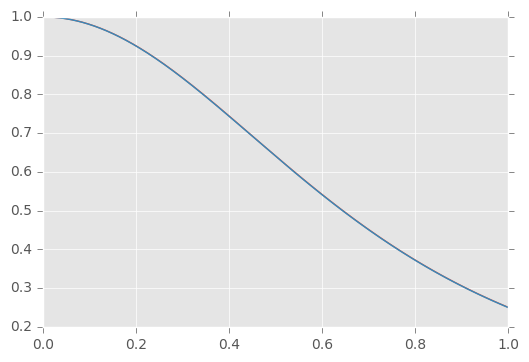

In [15]:
t=np.linspace(0,1,1000)
h=1./len(t)

u=[1]
tt=0

for i in range(len(t)-1):
    u1,tt=euler(tt,u[i],f,h)
    u.append(u1)

plt.plot(t,u)
plt.plot(t,ue(t))
plt.show()

# Solving the wave equation using pseudo-spectral methods

The strong form of the parameterised wave equation can be written 

"given $\mu \in \mathcal{P}$, find $u \in V$ such that 
$$  \Box u(t,r,\theta,\phi ; \mu) = s (t,r,\theta,\phi ; \mu) $$

where 

$$ \Box u = \frac{\partial^2 u }{\partial t^2} - \Delta u$$

is the d'Alembertian operator, 

$$\Delta u =\frac{\partial^2 u }{\partial r^2} + \frac{2}{r}\frac{\partial u }{\partial r} +\frac{1}{r^2}(\frac{\partial^2 u}{\partial \theta^2} +\frac{1}{\tan \theta}\frac{\partial u }{\partial \theta} + \frac{1}{\sin^2 \theta}\frac{\partial^2 u}{\partial \phi^2} )$$

is the Laplace operator  in flat space in spherical coordinates and $s \in V'$ is a source term."

The parameters $\mu$ in this case will describe the source. 

The source $s$ and solution $u$ are first decomposed into the spherical harmonics for their angular components:
$$ \Box \sum_{l=0}^\infty \sum_{m=-l}^{l} \hat{u}_{lm}(t,r;\mu) Y^m_l(\theta, \phi) =  \sum_{l=0}^\infty \sum_{m=-l}^{l} \hat{s}_{lm}(t,r;\mu) Y^m_l(\theta, \phi).$$

By the orthogonality of this $Y^m_l$, this can be solved separately for each pair $(l,m)$. Since by definition the spherical harmonics are eigenfunctions of the Laplace operator, $\Delta Y_l^m = l(l+1)Y^m_l$, we find

$$ \frac{\partial^2 \hat{u}_{lm}}{\partial t^2}-\frac{\partial^2 \hat{u}_{lm}}{\partial r^2}-\frac{2}{r}\frac{\partial \hat{u}_{lm}}{\partial r }-\frac{l(l+1) \hat{u}_{lm}}{r^2} = \hat{s}_{lm}.$$

Next the radial parts of $\hat{u}_{lm}(t,r;\mu)$ and $\hat{s}_{lm}(t,r;\mu)$ are expanded onto the Chebyshev polynomials $T_i(x)=\cos(i \arccos(x))$ where $x(r):\mathbb{R}^+ \cup\{0\} \rightarrow [-1,1]$ is some affine mapping. 